This notebook is the first of a series of various data analyses in which I try to better understand the United States' opioid epidemic. For background on this public health crisis: https://www.hhs.gov/opioids/about-the-epidemic/

The first dataset I will examine is the State of Connectcut's "Accidental Drug Related Deaths 2012-2016" https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015 

The corresponding csv file can be found in the directory.

In [5]:
#first, let's load the data and see its structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataframe = pd.read_csv('Accidental_Drug_Related_Deaths__2012-2016.csv')

In [6]:
print(dataframe.shape)

(3045, 32)


In [7]:
#let's see what the headers look like 
print(dataframe.columns)

Index([u'CaseNumber', u'Date', u'Sex', u'Race', u'Age', u'Residence City',
       u'Residence State', u'Residence County', u'Death City', u'Death State',
       u'Death County', u'Location', u'DescriptionofInjury', u'InjuryPlace',
       u'ImmediateCauseA', u'Heroin', u'Cocaine', u'Fentanyl', u'Oxycodone',
       u'Oxymorphone', u'EtOH', u'Hydro-codeine', u'Benzodiazepine',
       u'Methadone', u'Amphet', u'Tramad', u'Morphine (not heroin)', u'Other',
       u'Any Opioid', u'MannerofDeath', u'AmendedMannerofDeath', u'DeathLoc'],
      dtype='object')


As we see, there are a lot of different angles from which we can appraoch this data. Both the spatial and temporal elements can help provide more insight into how the epidemic is affecting the state of Connecticut. 

In [8]:
#from a high level, let's first see how the number of heroin-related deaths has changed over the course of the 4 years. 
#we can construct dataframes for each year and save them for later use
df_2012 = dataframe[dataframe['Date'].str.contains('2012')==True]
df_2013 = dataframe[dataframe['Date'].str.contains('2013')==True]
df_2014 = dataframe[dataframe['Date'].str.contains('2014')==True]
df_2015 = dataframe[dataframe['Date'].str.contains('2015')==True]
df_2016 = dataframe[dataframe['Date'].str.contains('2016')==True]

In [9]:
#We see 1652 heroin-related deaths in the entire dataset
print(dataframe['Heroin'].value_counts()['Y'])

1652


In [10]:
#Let's dig further into how many heroin-related deaths have occured on a year-by-year basis. 

print("Year\tHeroin-Related Deaths")
print("2012\t"+str(df_2012['Heroin'].value_counts()['Y']))
print("2013\t"+str(df_2013['Heroin'].value_counts()['Y']))
print("2014\t"+str(df_2014['Heroin'].value_counts()['Y']))
print("2015\t"+str(df_2015['Heroin'].value_counts()['Y']))
print("2016\t"+str(df_2016['Heroin'].value_counts()['Y']))


Year	Heroin-Related Deaths
2012	174
2013	256
2014	325
2015	415
2016	482


As we can see, the number of heroin-related deaths in the state of Connecticut has increased steadily in the past four years. We can use this as a baseline to dig deeper. 

Populating the interactive namespace from numpy and matplotlib


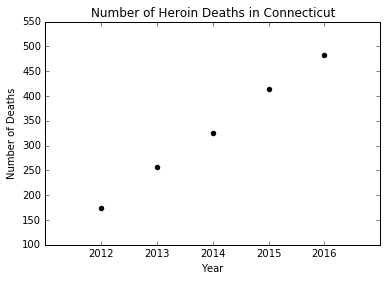

In [42]:
'''
Make a plot to visualize the data.
'''

# Load some inline features
%pylab inline

# Coerce the data into a useful format
t = ["2012", "2013", "2014", "2015", "2016"]
d = [dataframe[dataframe['Date'].str.contains(y)==True]['Heroin'].value_counts()['Y'] for y in t]

# Perform some plotting
plt.scatter(range(len(t)), d, marker='o', color='black');
xlabel("Year"); ylabel("Number of Deaths");
ylim([100,550])
title("Number of Heroin Deaths in Connecticut");
plt.xticks(range(5), t);